## Pre-processing & Lematization

In [41]:
!pip install Sastrawi

In [42]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Memuat Data
df = pd.read_csv('data_manual.csv')

# 2. Inisialisasi Stemmer (Pencari Kata Dasar)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. Preprocessing
def clean_and_stem(text):
    # Mengubah ke huruf kecil
    text = str(text).lower()
    # Menghapus karakter selain huruf, angka, dan spasi (tanda baca, emoji, dll)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = stemmer.stem(text)

    return text

# 4. Terapkan ke data (Ini mungkin memakan waktu sedikit lama)
print("Sedang memproses stemming... Mohon tunggu sebentar.")
df['cleaned_text'] = df['text'].apply(clean_and_stem)

# 5. Cek Hasil (Membandingkan Sebelum vs Sesudah)
print("\n--- Perbandingan Sebelum vs Sesudah Stemming ---")
print(df[['text', 'cleaned_text']].head())

# Terapkan pembersihan ke kolom 'text'
df['cleaned_text'] = df['text'].apply(clean_and_stem)

# 6. Simpan hasil agar tidak perlu stemming ulang
df.to_csv('data_manual_stemmed.csv', index=False)
print("\nData yang sudah di-stemming tersimpan di 'data_manual_stemmed.csv'")

# 7. Memisahkan Fitur (X) dan Target (y)
X = df['cleaned_text']
y = df['label']  # Label sentimen: positif, negatif, netral

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sedang memproses stemming... Mohon tunggu sebentar.

--- Perbandingan Sebelum vs Sesudah Stemming ---
                                                text  \
0  Tungguin aja bakal balik ke bawah 2 juta per g...   
1               Emas ada bentuk fisik nya\nBitcoin ?   
2  Lu makan aja tuh emas kalau bisa kenyang lu !!...   
3  Bukan palsu tetpi emas kurang .metal LG LG tin...   
4                      LM Antam habis di pegadaian 🤭   

                                        cleaned_text  
0  tungguin aja bakal balik ke bawah 2 juta per gram  
1                  emas ada bentuk fisik nya bitcoin  
2        lu makan aja tuh emas kalau bisa kenyang lu  
3  bukan palsu tetpi emas kurang metal lg lg ting...  
4                            lm antam habis di gadai  

Data yang sudah di-stemming tersimpan di 'data_manual_stemmed.csv'


## Eksperimen 1
### Naive Bayes + BoW

In [43]:
# 1. Ekstraksi Fitur: Bag of Words (BoW)
vectorizer = CountVectorizer()

# Fit pada data latih, lalu transform
X_train_bow = vectorizer.fit_transform(X_train)
# Hanya transform pada data uji
X_test_bow = vectorizer.transform(X_test)

# 2. Pelatihan Model: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# 3. Evaluasi Model
y_pred = nb_model.predict(X_test_bow)

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 46.67%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.48      0.57      0.52        21
      netral       0.38      0.30      0.33        20
     positif       0.53      0.53      0.53        19

    accuracy                           0.47        60
   macro avg       0.46      0.47      0.46        60
weighted avg       0.46      0.47      0.46        60



## Eksperimen 2
### Naive Bayes + TF-IDF

In [44]:
# 1. Ekstraksi Fitur: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit pada data latih, lalu transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Hanya transform pada data uji
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 2. Pelatihan Model: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 3. Evaluasi Model
y_pred = nb_model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 43.33%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.45      0.43      0.44        21
      netral       0.36      0.40      0.38        20
     positif       0.50      0.47      0.49        19

    accuracy                           0.43        60
   macro avg       0.44      0.43      0.44        60
weighted avg       0.44      0.43      0.43        60



## Eksperimen 3
### SVM + BoW

In [45]:
# 1. Ekstraksi Fitur: Bag of Words (BoW)
vectorizer = CountVectorizer()

# Fit pada data latih, lalu transform
X_train_bow = vectorizer.fit_transform(X_train)
# Hanya transform pada data uji
X_test_bow = vectorizer.transform(X_test)

# 2. Pelatihan Model: SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_bow, y_train)

# 3. Evaluasi Model
y_pred = svm_model.predict(X_test_bow)

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 36.67%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.37      0.52      0.43        21
      netral       0.42      0.40      0.41        20
     positif       0.27      0.16      0.20        19

    accuracy                           0.37        60
   macro avg       0.35      0.36      0.35        60
weighted avg       0.36      0.37      0.35        60



## Eksperimen 4
### SVM + TF-IDF

In [46]:
# 1. Ekstraksi Fitur: TF-IDF
tfidf = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 2. Pelatihan Model: SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# 3. Evaluasi
y_pred = svm_model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 38.33%

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.38      0.43      0.40        21
      netral       0.35      0.30      0.32        20
     positif       0.42      0.42      0.42        19

    accuracy                           0.38        60
   macro avg       0.38      0.38      0.38        60
weighted avg       0.38      0.38      0.38        60



## Tabel Perbandingan Hasil Akurasi

In [50]:
df = pd.read_csv('data_manual_stemmed.csv')

# 1. Split Data (Kita lakukan ulang di sini agar konsisten untuk semua model)
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Daftar Skenario Eksperimen
scenarios = [
    {
        'name': 'BoW + Naive Bayes',
        'vect': CountVectorizer(), # BoW biasanya default
        'clf': MultinomialNB()
    },
    {
        'name': 'TF-IDF + Naive Bayes',
        'vect': TfidfVectorizer(max_features=1000), # TAMBAHKAN INI
        'clf': MultinomialNB()
    },
    {
        'name': 'BoW + SVM',
        'vect': CountVectorizer(),
        'clf': SVC(kernel='linear', random_state=42)
    },
    {
        'name': 'TF-IDF + SVM',
        'vect': TfidfVectorizer(max_features=1000), # TAMBAHKAN INI
        'clf': SVC(kernel='linear', random_state=42)
    }
]

# 3. Loop Eksekusi dan Simpan Hasil
results = []

print("Sedang memproses perbandingan...")

for sc in scenarios:
    # A. Vektorisasi
    vectorizer = sc['vect']
    # Fit hanya di training, transform di training & testing
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # B. Training & Prediksi
    model = sc['clf']
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # C. Hitung Akurasi
    acc = accuracy_score(y_test, y_pred)

    # D. Simpan ke list
    results.append({
        'Kombinasi Model': sc['name'],
        'Akurasi Desimal': acc,
        'Akurasi Persen': f"{acc * 100:.2f}%"
    })

# 4. Buat DataFrame dan Tampilkan
comparison_df = pd.DataFrame(results)
# Urutkan dari yang tertinggi
comparison_df = comparison_df.sort_values(by='Akurasi Desimal', ascending=False).reset_index(drop=True)

print("\n" + "="*50)
print("HASIL AKHIR PERBANDINGAN MODEL")
print("="*50)
display(comparison_df[['Kombinasi Model', 'Akurasi Persen']])

Sedang memproses perbandingan...

HASIL AKHIR PERBANDINGAN MODEL


,Kombinasi Model,Akurasi Persen
0,BoW + Naive Bayes,46.67%
1,TF-IDF + Naive Bayes,43.33%
2,TF-IDF + SVM,38.33%
3,BoW + SVM,36.67%


/tmp/ipython-input-3991822268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Akurasi Desimal', y='Kombinasi Model', data=comparison_df, palette='viridis')


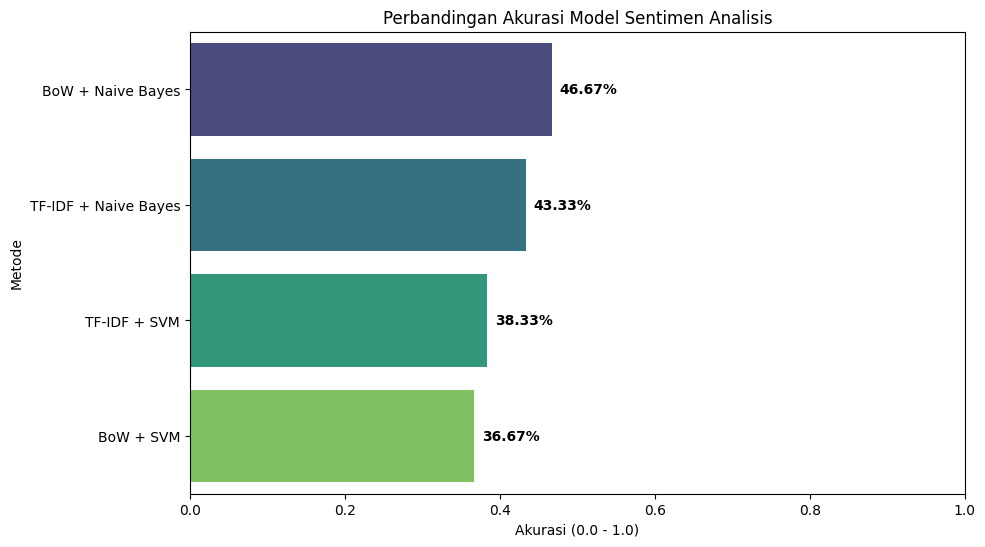

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Akurasi Desimal', y='Kombinasi Model', data=comparison_df, palette='viridis')

plt.title('Perbandingan Akurasi Model Sentimen Analisis')
plt.xlabel('Akurasi (0.0 - 1.0)')
plt.ylabel('Metode')
plt.xlim(0, 1.0) # Batas x dari 0 sampai 1

# Menambahkan label angka di ujung batang
for index, value in enumerate(comparison_df['Akurasi Desimal']):
    plt.text(value + 0.01, index, f"{value*100:.2f}%", va='center', fontweight='bold')

plt.show()